In [13]:
import os
import sys
import numpy as np
import pandas as pd
import subprocess
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

import itertools
from susipop import filter
from susipop import reader
from IPython.html.widgets import FloatProgress
from IPython.display import display
from ipywidgets import interactive
import ipywidgets as widgets
%matplotlib notebook

import plotly
import susipop as sp

from multiprocessing import Pool
from scipy.interpolate import griddata

from susipop.susi.cache import SusiCache as cache
import susipop as sp

from tqdm import *

def get_folder_list():
    f = next(os.walk('.'))[1]
    return f

/home/vsivadas/.local/lib/python2.7/site-packages/matplotlib/__init__.py:1357: UserWarning:

 This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.




In [14]:
def get_particle_pairs_at_timestep(dataset,t,gap= 1e-8):
    dataset.load_state(dataset.tlist[t])
    ball_positions = dataset.particles.r
    sim_chars = sp.susi.extract_sim_characteristics(dataset)
    sim_chars["gap"] = gap
    sim_chars = sp.susi.extract_sim_characteristics(dataset, **sim_chars)
    particle_pairs = sp.spatial.cluster_analysis.find_particle_pairs_cluster(ball_positions=ball_positions,**sim_chars)
    return particle_pairs
def largerst_cluster_size_vs_shearrate(dataset,t, gap=6.7e-8):
    dataset.load_state(dataset.tlist[t])
    s, ns = dataset.get_quantity("cluster_size_distribution", gap = gap, update=False)
    viscosity_file = pd.read_csv(dataset.dir+"/result/nu_t.dat")
    idx_t = np.where(viscosity_file[viscosity_file.columns[0]] == dataset.tlist[t])[0][0]
    viscosity = viscosity_file[viscosity_file.columns[2]][idx_t]
    max_cluster_size = max(s)/float(dataset.npart)
    shearstress = viscosity*dataset.config['experiment']['shearrate']['constant']['yd']
    return [max_cluster_size, shearstress, viscosity]

In [8]:
yd = 12.5
dataset = sp.reader.DataSet("rhor1_phi56_yd"+str(yd)+"/", particles = True, fluid=False)
# print dataset.dir
# viscosity_file = pd.read_csv(dataset.dir+"/result/nu_t.dat")
# viscosity = viscosity_file[viscosity_file.columns[2]][1:]
largerst_cluster_size_vs_shearrate(dataset,t=100, gap=1e-8)
# print viscosity_file.columns

[0.48034934497816595, 0.47195172204875002, 0.037756137763900001]

# Largest cluster vs shear stress in the system

  0%|          | 0/230 [00:00<?, ?it/s]

229
rhor1_phi56_yd10.0/


100%|██████████| 230/230 [01:29<00:00,  2.60it/s]


<IPython.core.display.Javascript object>


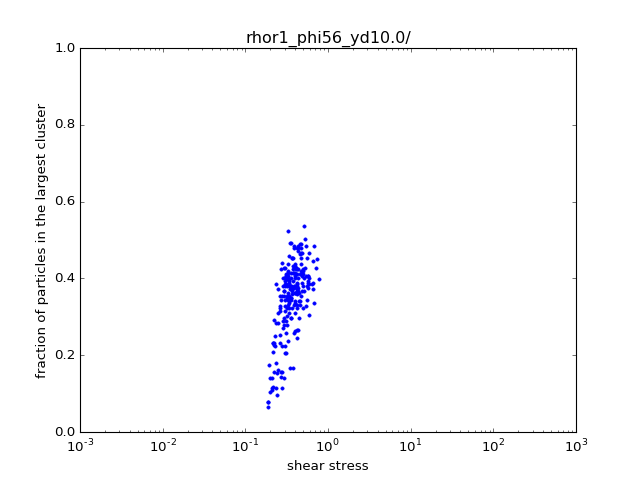

  0%|          | 0/499 [00:00<?, ?it/s]

229
rhor1_phi56_yd11.0/


100%|██████████| 499/499 [03:17<00:00,  2.52it/s]


<IPython.core.display.Javascript object>


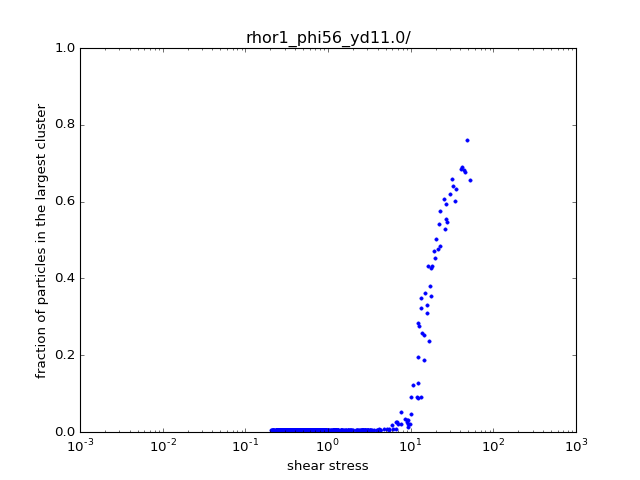

  0%|          | 0/446 [00:00<?, ?it/s]

229
rhor1_phi56_yd12.0/


100%|██████████| 446/446 [02:56<00:00,  2.50it/s]


<IPython.core.display.Javascript object>


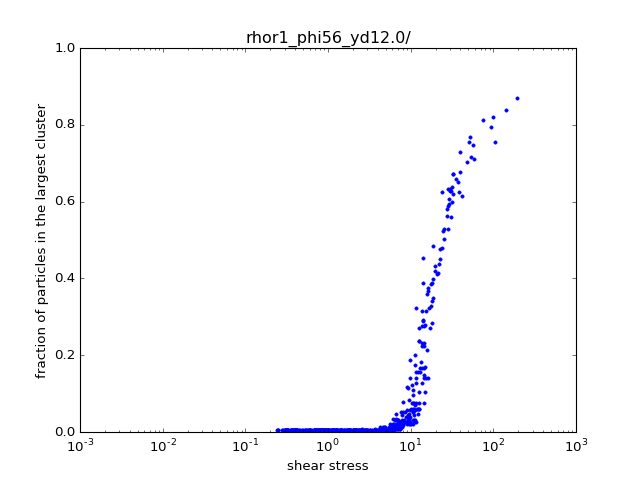

  0%|          | 0/481 [00:00<?, ?it/s]

229
rhor1_phi56_yd13.0/


100%|██████████| 481/481 [03:10<00:00,  2.46it/s]


<IPython.core.display.Javascript object>


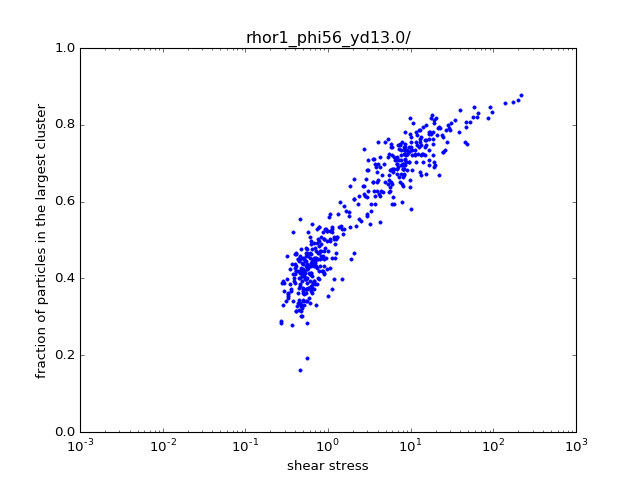

  0%|          | 0/499 [00:00<?, ?it/s]

229
rhor1_phi56_yd14.0/


100%|██████████| 499/499 [03:19<00:00,  2.44it/s]


<IPython.core.display.Javascript object>


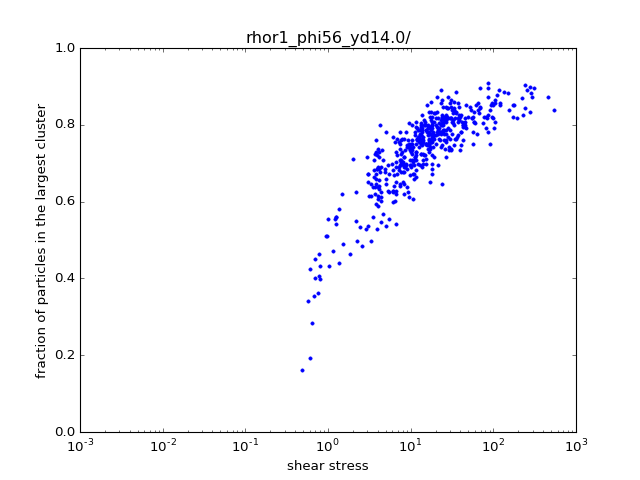

  0%|          | 0/155 [00:00<?, ?it/s]

229
rhor1_phi56_yd15.0/


100%|██████████| 155/155 [01:02<00:00,  2.46it/s]


<IPython.core.display.Javascript object>


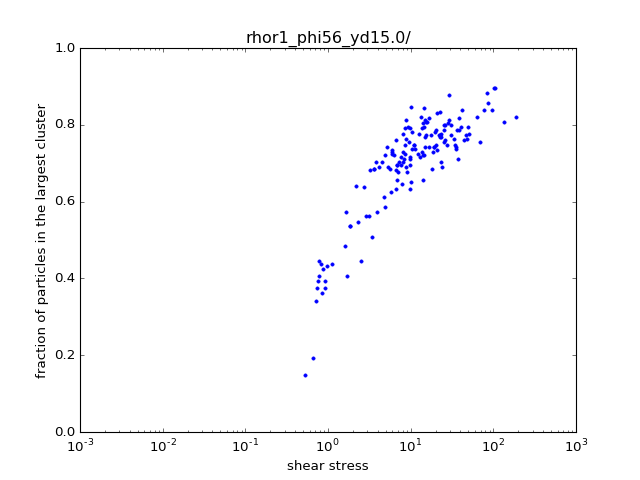

  0%|          | 0/290 [00:00<?, ?it/s]

229
rhor1_phi56_yd16.0/


100%|██████████| 290/290 [01:56<00:00,  2.41it/s]


<IPython.core.display.Javascript object>


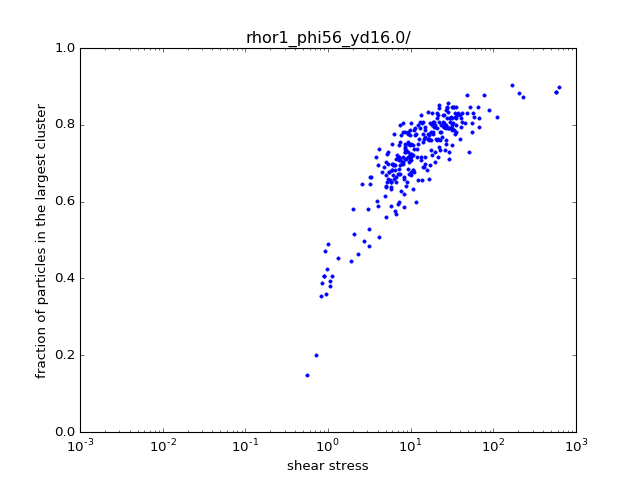

  0%|          | 0/499 [00:00<?, ?it/s]

229
rhor1_phi56_yd18.0/


100%|██████████| 499/499 [03:18<00:00,  2.57it/s]


<IPython.core.display.Javascript object>


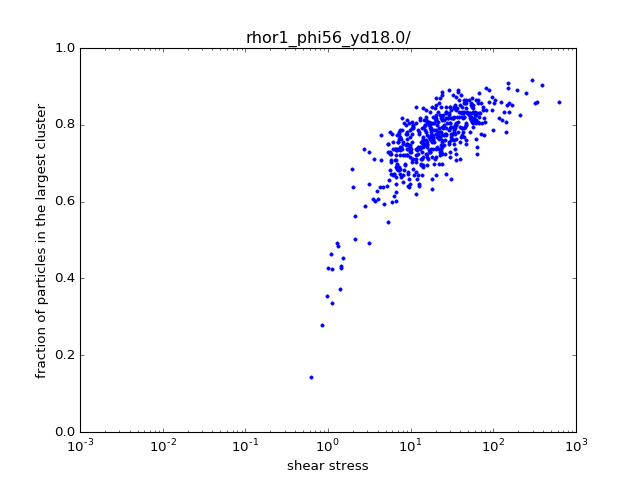

  0%|          | 0/249 [00:00<?, ?it/s]

229
rhor1_phi56_yd20.0/


100%|██████████| 249/249 [01:38<00:00,  2.54it/s]


<IPython.core.display.Javascript object>


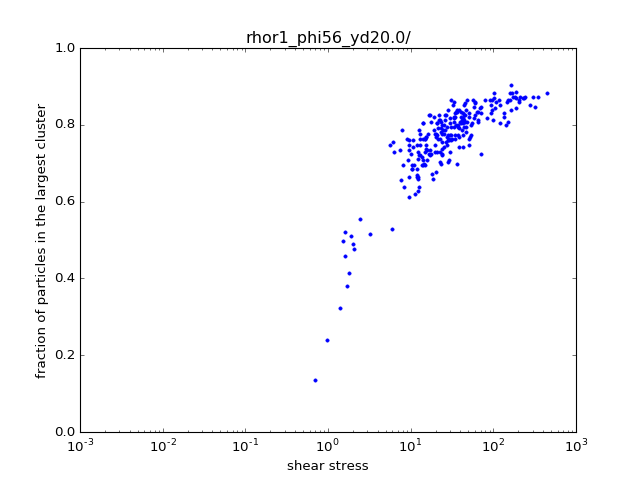

  0%|          | 0/546 [00:00<?, ?it/s]

229
rhor1_phi56_yd30.0/


100%|██████████| 546/546 [03:40<00:00,  2.44it/s]


<IPython.core.display.Javascript object>


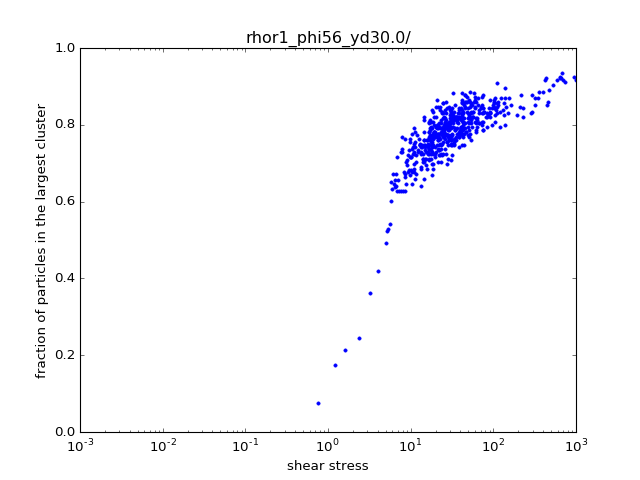

  0%|          | 0/376 [00:00<?, ?it/s]

229
rhor1_phi56_yd50.0/


100%|██████████| 376/376 [02:30<00:00,  2.58it/s]


<IPython.core.display.Javascript object>


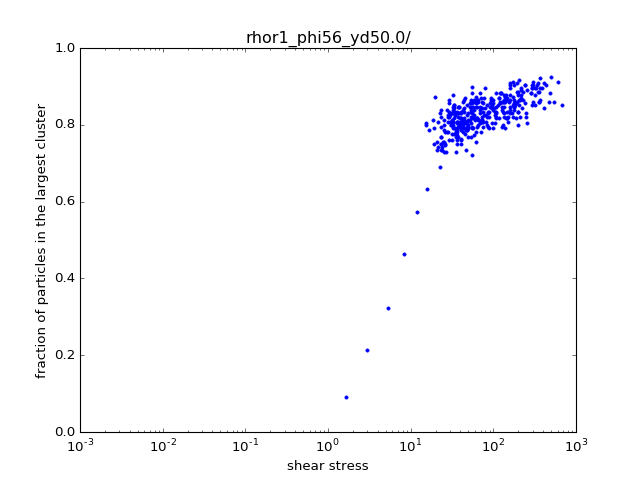

  0%|          | 0/220 [00:00<?, ?it/s]

229
rhor1_phi56_yd70.0/


100%|██████████| 220/220 [01:28<00:00,  2.52it/s]


<IPython.core.display.Javascript object>


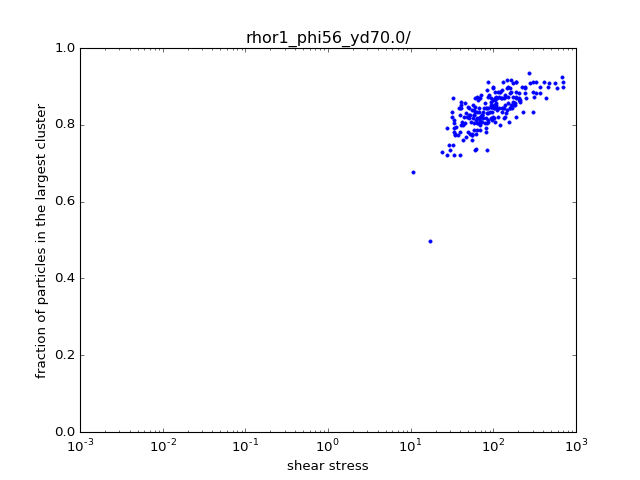

  0%|          | 0/352 [00:00<?, ?it/s]

229
rhor1_phi56_yd100.0/


100%|██████████| 352/352 [02:19<00:00,  2.56it/s]


<IPython.core.display.Javascript object>


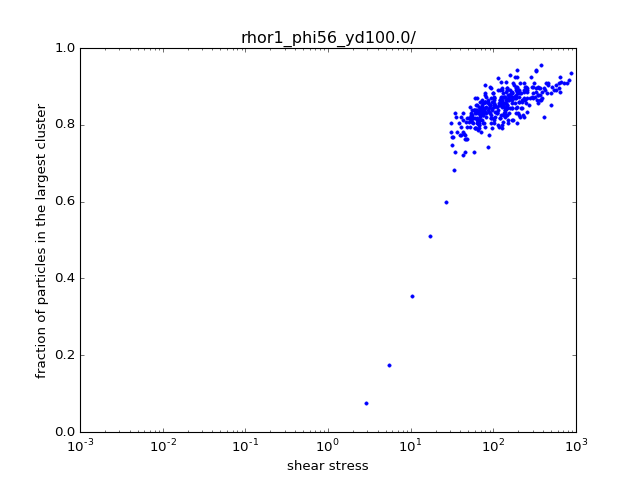

  0%|          | 0/286 [00:00<?, ?it/s]

229
rhor1_phi56_yd300.0/


100%|██████████| 286/286 [01:54<00:00,  2.57it/s]


<IPython.core.display.Javascript object>


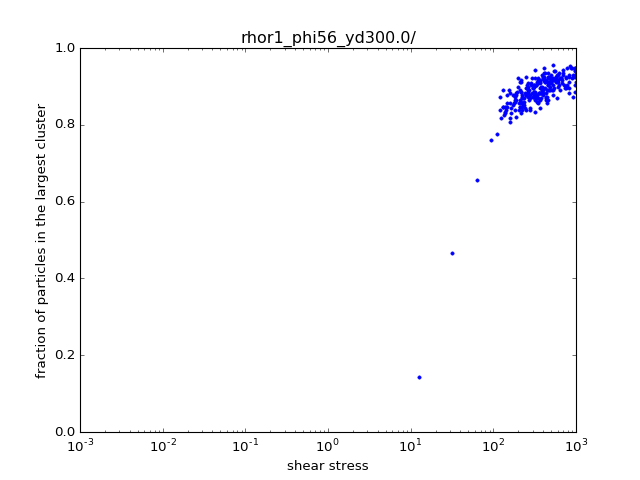

<IPython.core.display.Javascript object>


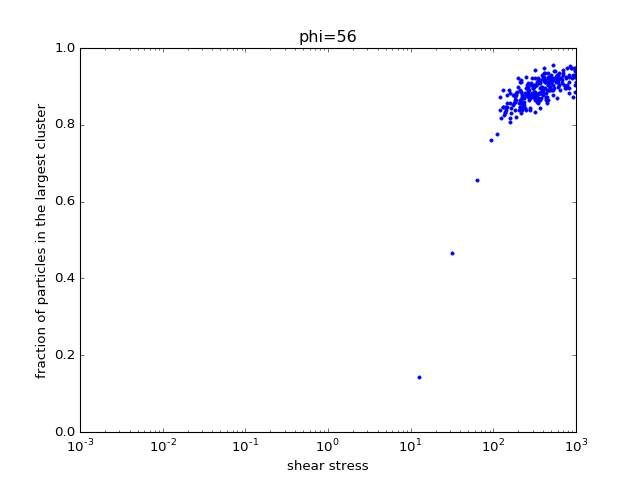

In [64]:
# ydlist =  [10.0,10.5,11.0,11.5,12.0,12.5,13.0,14.0,16.0,20.0,30.0]
ydlist = [float(i) for i in range(10,301)]
phi = 56
cluster_size_vs_shearstress_all = [[],[],[]]
for yd in ydlist:
    try:
        dataset = sp.reader.DataSet("rhor1_phi"+str(phi)+"_yd"+str(yd)+"/", particles = True, fluid=False)
        print dataset.npart
        print dataset.dir
        viscosity_file = pd.read_csv(dataset.dir+"/result/nu_t.dat")
        viscosity = viscosity_file[viscosity_file.columns[2]][1:]
        cluster_size_vs_shearstress = [[],[],[]]
        for i in trange(1,len(viscosity),2):
#         for i in trange(1,10):
            try:
                cluster_size_vs_shearstress[0].append(largerst_cluster_size_vs_shearrate(dataset, i)[0])
                cluster_size_vs_shearstress[1].append(largerst_cluster_size_vs_shearrate(dataset, i)[1])
                cluster_size_vs_shearstress[2].append(largerst_cluster_size_vs_shearrate(dataset, i)[2])
                
                cluster_size_vs_shearstress_all[0].append(largerst_cluster_size_vs_shearrate(dataset, i)[0])
                cluster_size_vs_shearstress_all[1].append(largerst_cluster_size_vs_shearrate(dataset, i)[1])
                cluster_size_vs_shearstress_all[2].append(largerst_cluster_size_vs_shearrate(dataset, i)[2])
                
            except:
                continue
        plt.figure()
#         plt.ioff()
#         plt.yscale("log")
        plt.xscale("log")
        plt.xlim([1e-3,1e3])
        plt.ylim([0,1])
        plt.title(dataset.dir)
        plt.xlabel("shear stress")
        plt.ylabel("fraction of particles in the largest cluster")
        plt.plot(cluster_size_vs_shearstress[1],cluster_size_vs_shearstress[0],'.')
    except Exception as e:    
#         print e
        continue
plt.figure()
#         plt.ioff()
#         plt.yscale("log")
plt.xscale("log")
plt.xlim([1e-3,1e3])
plt.ylim([0,1])
# plt.title(dataset.dir)
plt.title("phi="+str(phi))
plt.xlabel("shear stress")
plt.ylabel("fraction of particles in the largest cluster")
plt.plot(cluster_size_vs_shearstress[1],cluster_size_vs_shearstress[0],'.')

In [66]:
# plt.figure()
#         plt.ioff()
#         plt.yscale("log")
plt.xscale("log")
plt.xlim([1e-3,1e3])
plt.ylim([0,1])
# plt.title(dataset.dir)
plt.title("phi="+str(phi))
plt.xlabel("shear stress")
plt.ylabel("fraction of particles in the largest cluster")
# plt.plot(cluster_size_vs_shearstress[1],cluster_size_vs_shearstress[0],'.')

# Frictional pair interaction duration using sp.temporal.cluster_duration.bond_duration_distribution

In [48]:
phi = 56
yd = 12.0
path = "rhor1_phi"+str(phi)+"_yd+"+str(float(yd))+"/"
dataset = sp.reader.DataSet(, particles = True, fluid=False)
particle_pairs_in_time = []
for i in trange(len(dataset.tlist)):
    particle_pairs_in_time.append(get_particle_pairs_at_timestep(dataset,i))

SyntaxError: invalid syntax (<ipython-input-48-1d44e156e88b>, line 1)

<IPython.core.display.Javascript object>


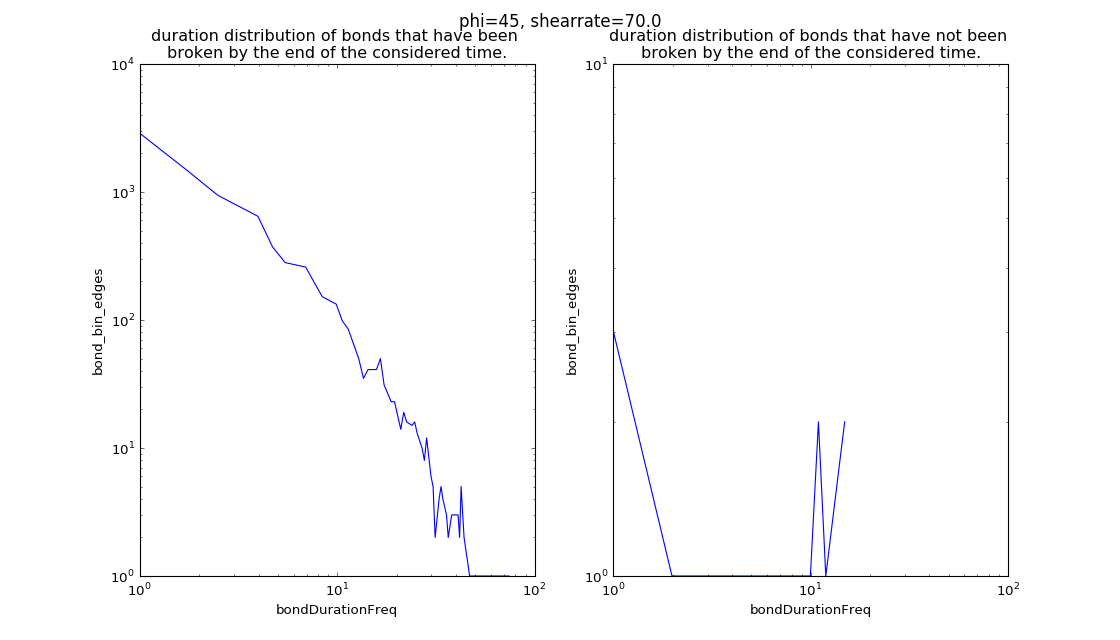

[  1.     1.98   9.96  10.94  11.92  14.86] [3 1 1 2 1 2]


In [45]:
histogram_bd  = dict(bins = 100)

ret = sp.temporal.cluster_duration.bond_duration_distribution(particle_pairs_in_time= particle_pairs_in_time, 
                                                              dt = 1.0,
                                                              histogram_bd = histogram_bd, normalize=False)
(bond_bin_edges, bondDurationFreq), (unbond_bin_edges, unbondDurationFreq) = ret
plt.figure(figsize=[14,8])
plt.suptitle("phi="+str(phi)+", shearrate="+str(yd),fontsize=15)
plt.subplot(121)
plt.xscale("log")
plt.yscale("log")
plt.ylabel("bond_bin_edges")
plt.xlabel("bondDurationFreq")
plt.plot(bond_bin_edges, bondDurationFreq)
plt.title("duration distribution of bonds that have been \nbroken by the end of the considered time.")
plt.subplot(122)
plt.xscale("log")
plt.yscale("log")
plt.ylabel("bond_bin_edges")
plt.xlabel("bondDurationFreq")
plt.plot(unbond_bin_edges, unbondDurationFreq)
plt.title("duration distribution of bonds that have not been \nbroken by the end of the considered time.")
print unbond_bin_edges, unbondDurationFreq

In [ ]:
import cProfile
def fa(s):
    return np.exp(s**10)
def foo(a,b,s):
    x = 0
    for i in range(100):
        x += a +b + fa(s)
    return x

cProfile.run('foo(1,2,3)')